# This are some codes for the first chapter of PRML, in order to visulize some results.
I just found it a little bit hard to fully understand the book, especially for those people who are not familiar with statistics. Thus I write those codes to visulize some results in oder to get some intuitions.         By **Tao Yang** (tao_yang@zju.edu.cn)

Go For It![][Mou icon1]

[Mou icon1]:https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562424751386&di=d9a9bda39c6f1709b29c663e4051de51&imgtype=0&src=http%3A%2F%2Fpic27.nipic.com%2F20130330%2F9591774_152548353000_2.jpg



[Mou icon]: http://mouapp.com/Mou_128.png


# 1、The first code is for  the variance of x

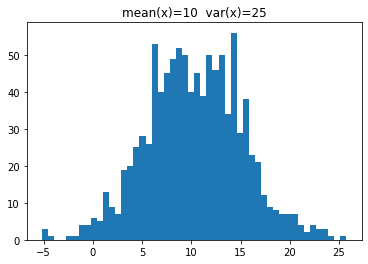

11143.762260979951


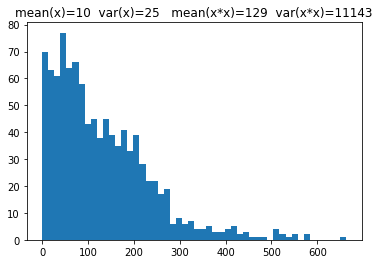

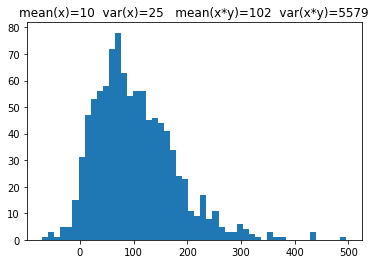

In [52]:
import numpy as np
import matplotlib.pyplot as plt
mean=10
std=5
x=np.random.normal(loc=mean,scale=std,size=(1000)) ##cale is the standard deviation
y=np.random.normal(loc=mean,scale=std,size=(1000))
t=np.linspace(1,100,100)
plt.hist(x,50)
plt.title("mean(x)="+str(mean)+"  var(x)="+str(std*std))

plt.show()
plt.hist(x*x,50)
plt.title("mean(x)="+str(mean)+"  var(x)="+str(std*std)+"   mean(x*x)="+str(int(np.mean(x*x)))+"  var(x*x)="+str(int(np.var(x*x))))
print(np.var(x*x))
plt.show()
plt.hist(x*y,50)

plt.title("mean(x)="+str(mean)+"  var(x)="+str(std*std)+"   mean(x*y)="+str(int(np.mean(x*y)))+"  var(x*y)="+str(int(np.var(x*y))))
plt.show()


## **sumary** 
As you can see, if x and y are i.i.d (independent adn identically distributed), you will know that x*x has a lager variance.$\sigma =5 , \mu =10$  
### tips
- E($x^2 $) is not variance of $x^2$
- E($x^2$) =$\sigma ^2 + \mu ^2 $ is lager than E($x*y$)=$\sigma ^2$

# 2、 move on to the biased estimation

this is the mean of x ,E(x)=99.98854436743686
this is the biased var of x ,var(x)=2480.1046852593227
this is the unbiased var of x ,var(x)=2505.1562477366897


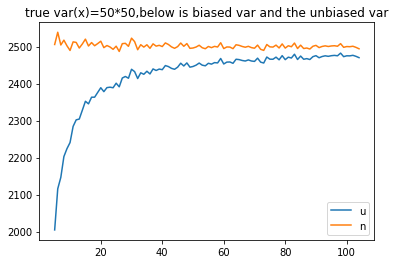

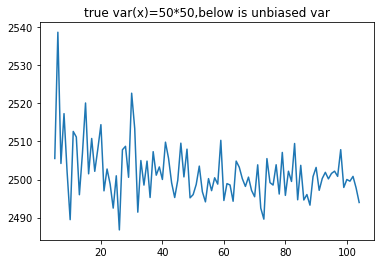

In [121]:
import numpy as np
import matplotlib.pyplot as plt
mean=100
std=50

def bias_exp(size=100):
    var=0
    mean_total=0
    for i in range(10000):
        x=np.random.normal(loc=mean,scale=std,size=(size)) ##cale is the standard deviation
        mean_total=mean_total+np.mean(x)
        #print(np.mean(x))
        var=var+np.var(x)
    return mean_total, var
mean_total, var=bias_exp()
print("this is the mean of x ,E(x)="+ str(mean_total/10000))
print("this is the biased var of x ,var(x)="+ str(var/10000))
print("this is the unbiased var of x ,var(x)="+ str(var/10000*100/99))

ind_list=[]
biased_var_list=[]
unbiased_var_list=[]

for i in range(100):
    mean_total, var=bias_exp(size=i+5)
    biased_var_list.append(var/10000)
    unbiased_var_list.append(var/10000*(i+5)/(i+4))

    ind_list.append(i+5)
plt.plot(ind_list,biased_var_list)
plt.legend("baised var")
plt.title("true var(x)=50*50,below is biased var and the unbiased var")
plt.plot(ind_list,unbiased_var_list)
plt.legend("unbaised var")
plt.show()
plt.plot(ind_list,unbiased_var_list)
plt.title("true var(x)=50*50,below is unbiased var")
plt.show()
    



## as you can see, I do 10000 times experiments, and i just found that
- for small data sets, the var is indeed biased.
- unbiased var indeed works.

# 3、Let's consider high dimension gaussian distribution
-   $ S_D=\frac{2\pi^{D/2}}{\Gamma (D/2)}$   $ \Gamma $is the $ \Gamma $function is the surface area of a sphere of unit radius
-   $ p(r)=\frac {S_D r^{D-1}}{(2\pi\sigma^2)^{D/2}}  exp(-\frac{r^2}{2\sigma^2})$

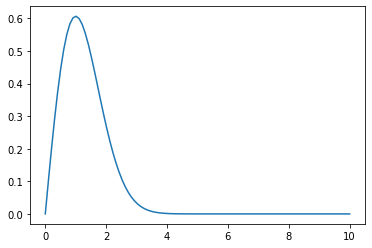

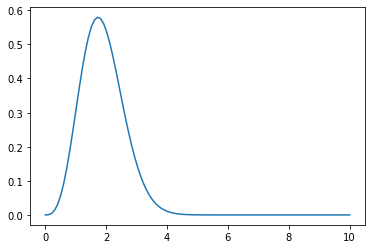

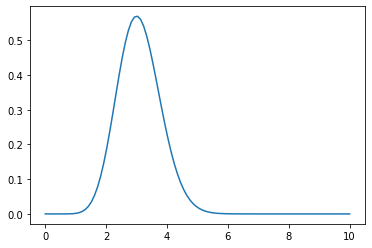

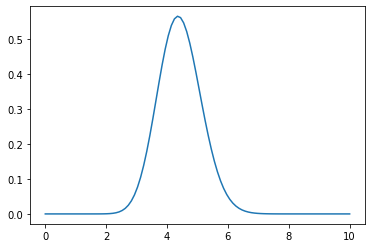

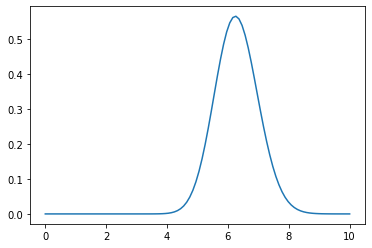

In [159]:
# first we define surface area functin
def S_ndim(n):
        Sd=2*3.1415**(n/2)/np.math.factorial(n/2-1)
        return Sd
def guas_den_ndim(n,r):
    std=1
    den=S_ndim(n)*r**(n-1)/(2*3.1415*std**2)**(n/2)*np.exp(-r**2/(2*std**2))
    return den

def gualist(n,r_list):
    denlist=[]
    for i in r_list:
        denlist.append(guas_den_ndim(n,i))
    return denlist


ll=np.linspace(0,10,100)
s2=guas_den_ndim(4,0.5)
den_2=gualist(2,ll)
den_4=gualist(4,ll)
den_10=gualist(10,ll)
den_20=gualist(20,ll)
den_40=gualist(40,ll)
plt.plot(ll,den_2)
plt.show()
plt.plot(ll,den_4)
plt.show()
plt.plot(ll,den_10)
plt.show()
plt.plot(ll,den_20)
plt.show()
plt.plot(ll,den_40)
plt.show()

## the mode changes from because the area enlarge as r grows.

# 4、we move on to the Bayesian curve fitting
- so far, we don't know how to deduce the variance. so we just use it.

(40,)
(40,)


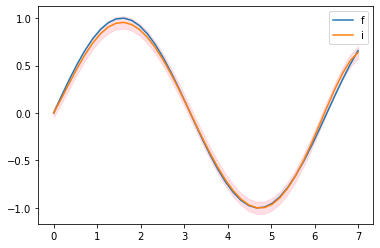

In [275]:
d_x=np.linspace(0,7,40)
sin_x=np.sin(d_x)
true_x=plt.plot(d_x,sin_x)
plt.legend(true_x,"true")

noise=np.random.normal(loc=0,scale=0.1,size=np.size(d_x))
sin_noise=sin_x+noise
#plt.plot(d_x,sin_noise)


def bayesian_fitting(x,y,alpha,beta,N=9):
    
   # 
    phi_x=np.zeros(np.size(d_x))
    for i in range(1, N):
        phi_x=np.column_stack((phi_x,x**i))
    #print(np.shape(phi_x))
    S_=alpha*np.eye(N,N)+beta*phi_x.T@phi_x
    S=np.linalg.inv(S_)
    phi_x.T@y
    S@(phi_x.T@y)
    m_x=beta*phi_x@S@(phi_x.T@y)
    
    print(np.shape(m_x))
    var_x=1/beta+np.sum(phi_x@S@phi_x.T,1)
    
    return m_x,var_x
x_fitted,var=bayesian_fitting(d_x,sin_noise,0.1,500,6)
std=np.sqrt(var)
print(np.shape(x_fitted))
plt.plot(d_x,x_fitted)
plt.legend("fitted",loc='best')
plt.fill_between(d_x, x_fitted - std, x_fitted + std, color="pink", label="std.", alpha=0.5)

plt.show()
    
    


## $ A_{i,j}w_i+w_j=A_{i,j}w_i+I_{i,j}w_i=(A+I) \bullet   w$ 
- I dont know how to deduce, thus I can't get anything from this picture. Maybe it's due to it's in first chapter, thus many things are not so clear so far.

# 5、Let's move to entropy
    - consider a guassian distribution's entropy

In [276]:
noise=np.random.normal(loc=0,scale=0.1,size=100)

